# Unit 5 - Financial Planning

In [349]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [372]:
# Load .env enviroment variables
load_dotenv('key.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [373]:
btc_url = 'https://api.alternative.me/v2/'
BTC_amount = 1.2

In [374]:
my_btc = requests.get(btc_url + 'ticker/1/').json()
my_btc = pd.json_normalize(my_btc)
my_btc = my_btc.set_index('data.1.name')
my_btc_copy = my_btc['data.1.quotes.USD.price'].copy(deep=False)
my_btc = my_btc['data.1.quotes.USD.price'][0]
#my_btc = pd.DataFrame(my_btc)
my_btc = float(my_btc)

In [375]:
# Compute current value of my crpto
#my_btc_value = my_btc.dot(BTC_amount)
my_btc_value = my_btc * (BTC_amount)

In [376]:
eth_url = 'https://api.alternative.me/v2/'
ETH_amount = 5.3

my_eth = requests.get(eth_url + 'ticker/1027/').json()
my_eth = pd.json_normalize(my_eth)
my_eth = my_eth.set_index('data.1027.name')
my_eth_copy = my_eth['data.1027.quotes.USD.price'].copy(deep=False)
my_eth = my_eth['data.1027.quotes.USD.price'][0]
#my_eth = pd.DataFrame(my_eth)
my_eth = float(my_eth)
my_eth


3126.9

In [414]:
# Compute current value of my crpto
#my_eth_value = my_eth.dot(ETH_amount)
my_eth_value = my_eth * (ETH_amount)
my_eth_value

# Print current crypto wallet balance
my_crypto_wallet = my_btc_value + my_eth_value
my_crypto_wallet = int(my_crypto_wallet)


print(f"The current value of your {BTC_amount} BTC shares is ${my_btc_value:0.2f}")
print(f"The current value of your {ETH_amount} BTC shares is ${my_eth_value:0.2f}")

print('-------------------------------------------------------')

print(f"The current value of your crypto-WALLET is ${my_crypto_wallet}")

The current value of your 1.2 BTC shares is $50239.20
The current value of your 5.3 BTC shares is $16572.57
-------------------------------------------------------
The current value of your crypto-WALLET is $66811


In [415]:
#stocks_df_joined = pd.concat([agg_daily, spy_daily], axis='columns', join='outer')

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [416]:
# Set current amount of shares
agg_amount = [200]
spy_amount = [50]

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")\

# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Format current date as ISO format
start_date = pd.Timestamp("2020-01-01", tz="America/New_york").isoformat()
end_date = pd.Timestamp("2021-01-01", tz="America/New_york").isoformat()

tickers = 'SPY', 'AGG'
# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
tickers_df = api.get_barset(
tickers,
timeframe,
start=end_date,
limit=1000,
).df
# Preview DataFrame  
tickers_df.head(10)

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2021-01-04 00:00:00-05:00  118.08  118.1400  117.9850  118.040  6211938   
2021-01-05 00:00:00-05:00  118.06  118.0600  117.7500  117.915  5915389   
2021-01-06 00:00:00-05:00  117.90  117.9000  117.1500  117.360  8587136   
2021-01-07 00:00:00-05:00  117.13  117.2600  117.0667  117.210  4949593   
2021-01-08 00:00:00-05:00  117.18  117.3428  116.9800  117.090  5580443   
2021-01-11 00:00:00-05:00  117.02  117.0500  116.8900  116.890  5047096   
2021-01-12 00:00:00-05:00  116.82  116.9900  116.6800  116.980  5103382   
2021-01-13 00:00:00-05:00  117.63  117.6300  117.0800  117.360  5686592   
2021-01-14 00:00:00-05:00  117.37  117.4500  117.0800  117.150  5311077   
2021-01-15 00:00:00-05:00  117.34  117.3600  117.1800  117.260  4776104   

                              SPY                                      
                             open    high       low   close    volume  
time                                                                   
2021-01-04 00:00:00-05:00  375.31  375.45  364.8200  368.85  92938087  
2021-01-05 00:00:00-05:00  368.10  372.50  368.0500  371.32  53668865  
2021-01-06 00:00:00-05:00  369.71  376.98  369.1200  373.53  91989131  
2021-01-07 00:00:00-05:00  376.10  379.90  375.9100  379.06  58862006  
2021-01-08 00:00:00-05:00  380.59  381.49  377.1000  381.24  60275466  
2021-01-11 00:00:00-05:00  377.85  380.58  377.7189  378.74  44814805  
2021-01-12 00:00:00-05:00  378.89  379.86  376.3600  378.81  45364896  
2021-01-13 00:00:00-05:00  378.69  380.86  377.8500  379.76  38355050  
2021-01-14 00:00:00-05:00  380.59  381.13  378.1000  378.45  41045335  
2021-01-15 00:00:00-05:00  376.72  377.58  373.7000  375.68  78405054

In [417]:
# Pick AGG and SPY .close prices
tickers_df.head(10)
AGG_df = tickers_df["AGG"]
SPY_df = tickers_df['SPY']
agg_daily = AGG_df['close']
spy_daily = SPY_df['close']
agg_close_df = pd.DataFrame(agg_daily)
spy_close_df = pd.DataFrame(spy_daily)

agg_close_price = AGG_df['close'][-1]
spy_close_price = SPY_df['close'][-1]



# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $111.8629
Current SPY closing price: $454.95


In [418]:
# Compute the current value of shares
my_agg_value = agg_close_df.dot(agg_amount)
my_spy_value = spy_close_df.dot(spy_amount)
copy_agg_value = my_agg_value.copy(deep=False)
copy_spy_value = my_spy_value.copy(deep=False)
my_agg_value = int(my_agg_value[-1])
my_spy_value = int(my_spy_value[-1])
stocks_df_joined = pd.concat([agg_daily, spy_daily], axis='columns', join='outer')
# Print current value of shares

my_stock_wallet = my_agg_value +  my_spy_value
my_stock_wallet = (my_stock_wallet)

print(f"The current value of your {spy_amount} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {agg_amount} AGG shares is ${my_agg_value:0.2f}")
print('--------------------------------------------------------------------------')
print(f"The current value of your stock-WALLET is ${my_stock_wallet}")

The current value of your [50] SPY shares is $22747.00
The current value of your [200] AGG shares is $22372.00
--------------------------------------------------------------------------
The current value of your stock-WALLET is $45119


### Savings Health Analysis

In [433]:
# Set monthly household income
monthly_income = 12,000


# Consolidate financial assets data

df_savings = [
my_agg_value + my_spy_value,
my_btc_value + my_eth_value
]

# Create savings DataFrame

df_savings = pd.DataFrame(df_savings, columns=["ammount"], index=["stocks", "crypto"])


# Display savings DataFrame
display(df_savings)

,ammount
stocks,45119.00
crypto,66811.77


array([<AxesSubplot:ylabel='ammount'>], dtype=object)

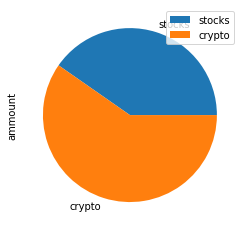

In [434]:
# Plot savings pie chart
df_savings.plot(kind='pie',subplots=True)

In [462]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
if df_savings > emergency_fund or df_savings == emergency_fund:
    print(f"congrats you emergency fund is healthy!!!")
else:
    print(f"your emergency fund needs work")
df_savings

ValueError: Unable to coerce to Series, length must be 1: given 6

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [369]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('1992-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-01-18', tz='America/New_York').isoformat()

# Get 5 years' worth of historical data for SPY and AGG
tickers = ["SPY", "AGG"]
timeframe = '1D'
portafolio_30y_df = api.get_barset(tickers,
                               timeframe,
                                start=start_date,
                               end=end_date,
                               limit=1000,
                              ).df



# Display sample data
portafolio_30y_df.head()


AGG                                       \
                             open     high     low    close     volume   
time                                                                     
2018-01-29 00:00:00-05:00  108.14  108.210  108.02  108.190  3532887.0   
2018-01-30 00:00:00-05:00  108.12  108.120  107.92  108.005  2965870.0   
2018-01-31 00:00:00-05:00  108.20  108.210  107.88  108.090  5729791.0   
2018-02-01 00:00:00-05:00  107.75  107.825  107.48  107.490  8569565.0   
2018-02-02 00:00:00-05:00  107.25  107.345  107.10  107.200  4266243.0   

                              SPY                                       
                             open    high     low   close       volume  
time                                                                    
2018-01-29 00:00:00-05:00     NaN     NaN     NaN     NaN          NaN  
2018-01-30 00:00:00-05:00  282.59  283.29  281.22  281.66   86366361.0  
2018-01-31 00:00:00-05:00  282.73  283.30  280.68  281.91   76360186.0  
2018-02-01 00:00:00-05:00  281.04  283.06  280.68  281.60   64693558.0  
2018-02-02 00:00:00-05:00  280.08  280.23  275.41  275.52  121717871.0

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
portafio_sim_30y = MCSimulation(
    portfolio_data = portafolio_30y_df,
    weights = [.40, .60,],
    num_simulation = 500,
    num_trading_days = 252*30
)
-

In [366]:
# Printing the simulation input data
portafio_sim_30y.portafolio_data()

NameError: name 'portafio_sim_30y' is not defined

In [367]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
portafio_sim_30y.calc_cumulative_return()

NameError: name 'portafio_sim_30y' is not defined

In [ ]:
# Plot simulation outcomes
portafolio_plot = portafio_sim_30y.plot_simulation()



In [ ]:
# Plot probability distribution and confidence intervals
distribuition_plot = portafio_sim_30y.plot_distribution()

### Retirement Analysis

In [264]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = portafio_sim_30y.summarize_cumulative_return()
# Print summary statistics
print(even_tbl)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\penti\OneDrive\Desktop\git_hub_class_repo\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [283]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
portfolio_ci_lower = round(even_tbl[8]*initial_investment,2)
portfolio_ci_upper = round(even_tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${portafolio_ci_lower} and ${portfolio_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $64310.84 and $1003650.19


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [284]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
portafolio_ci_lower = round(even_tbl[8]*(initial_investment),2)
portafolio_ci_upper = round(even_tbl[9]*(initial_investment),2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${portafolio_ci_lower} and ${portafolio_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $96466.26 and $1505475.28


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [303]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2017-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-01-18', tz='America/New_York').isoformat()

# Get 5 years' worth of historical data for SPY and AGG
tickers = ["SPY", "AGG"]
timeframe = '1D'
portafolio_5y_df = api.get_barset(tickers,
                               timeframe,
                                start=start_date,
                               end=end_date,
                               limit=1000,
                              ).df



# Display sample data
portafolio_5y_df.head()


AGG                                       \
                             open     high     low    close     volume   
time                                                                     
2018-01-29 00:00:00-05:00  108.14  108.210  108.02  108.190  3532887.0   
2018-01-30 00:00:00-05:00  108.12  108.120  107.92  108.005  2965870.0   
2018-01-31 00:00:00-05:00  108.20  108.210  107.88  108.090  5729791.0   
2018-02-01 00:00:00-05:00  107.75  107.825  107.48  107.490  8569565.0   
2018-02-02 00:00:00-05:00  107.25  107.345  107.10  107.200  4266243.0   

                              SPY                                       
                             open    high     low   close       volume  
time                                                                    
2018-01-29 00:00:00-05:00     NaN     NaN     NaN     NaN          NaN  
2018-01-30 00:00:00-05:00  282.59  283.29  281.22  281.66   86366361.0  
2018-01-31 00:00:00-05:00  282.73  283.30  280.68  281.91   76360186.0  
2018-02-01 00:00:00-05:00  281.04  283.06  280.68  281.60   64693558.0  
2018-02-02 00:00:00-05:00  280.08  280.23  275.41  275.52  121717871.0

In [304]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
simulation_port_5y = MCSimulation(
    portfolio_data = portafolio_df,
    weights = [.40, .60],
    num_simulation = 1000,
    num_trading_days = 252*5)

In [305]:
# Plot simulation outcomes
simulation_port_5y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\penti\OneDrive\Desktop\git_hub_class_repo\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.984270,0.993873,0.993826,1.003227,0.995065,1.000354,1.010051,1.004889,0.990351,1.001699,...,1.000081,1.010501,1.003836,1.008548,0.999770,1.001627,0.991133,1.005956,0.998913,1.001616
2,0.971980,0.992462,0.994011,1.004778,1.000244,0.999720,0.999811,1.002790,0.981423,0.988415,...,0.998370,1.017804,1.006891,1.003243,1.010687,1.000594,0.997181,0.999197,1.002641,1.004445
3,0.973567,0.983479,1.008804,1.021241,0.998711,1.016574,1.005404,0.990540,0.979979,0.995166,...,1.015273,1.020455,1.022614,0.998954,1.003494,1.013024,1.002836,0.995491,1.004404,0.995905
4,0.965898,0.993025,1.017097,1.026873,0.999949,1.028420,0.988874,0.996368,0.981078,0.999960,...,1.022029,1.020357,1.030665,0.999455,1.007058,1.016023,0.997347,0.991044,1.008788,0.993635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.508893,0.977919,1.749257,2.551998,1.391199,1.353129,2.698245,1.692633,2.111248,1.310226,...,1.172585,1.545389,1.435524,1.832307,1.220249,1.923734,2.017839,1.770073,1.222815,1.246435
1257,1.521878,0.988159,1.725898,2.557014,1.394429,1.366000,2.712388,1.692274,2.115782,1.297434,...,1.154190,1.573210,1.417000,1.835546,1.244314,1.932381,2.004200,1.800038,1.214588,1.251112
1258,1.536014,1.000881,1.724733,2.541297,1.389693,1.370604,2.717386,1.714616,2.115723,1.283249,...,1.154040,1.563629,1.413077,1.837195,1.231390,1.942356,2.025435,1.809794,1.214323,1.242580
1259,1.534004,1.011584,1.720350,2.551235,1.391931,1.388484,2.705639,1.700826,2.102077,1.282256,...,1.155204,1.557708,1.396827,1.839736,1.251824,1.968242,2.013936,1.803116,1.225842,1.235599


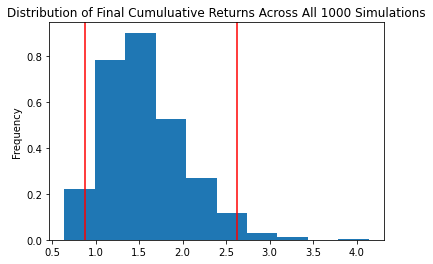

In [306]:
# Plot probability distribution and confidence intervals
prob_dist02 = simulation_port_5y.plot_distribution()

In [307]:
# Fetch summary statistics from the Monte Carlo simulation results
port_5y_tbl = simulation_port_5y.summarize_cumulative_return()

# Print summary statistics
print(port_5y_tbl)

count           1000.000000
mean               1.570128
std                0.457763
min                0.641900
25%                1.242448
50%                1.510248
75%                1.805319
max                4.138329
95% CI Lower       0.882249
95% CI Upper       2.625961
Name: 1260, dtype: float64


In [310]:
# Set initial investment
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

portafolio_lower = round(port_5y_tbl[8]*initial_investment,2)
portafolio_upper = round(port_5y_tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${portafolio_lower} and ${portafolio_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $17644.98 and $52519.22


### Ten Years Retirement Option

In [312]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
start_date = pd.Timestamp('2012-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-01-18', tz='America/New_York').isoformat()

# Get 5 years' worth of historical data for SPY and AGG
tickers = ["SPY", "AGG"]
timeframe = '1D'
portafolio_sim_10y = api.get_barset(tickers,
                               timeframe,
                                start=start_date,
                               end=end_date,
                               limit=1000,
                              ).df



# Display sample data
portafolio_sim_10y = MCSimulation(
    portfolio_data = portafolio_df,
    weights = [.40, .60],
    num_simulation = 1000,
    num_trading_days = 252*10)

In [314]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
portafolio_sim_10y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\penti\OneDrive\Desktop\git_hub_class_repo\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994278,1.000324,0.998344,1.003250,0.992748,1.002735,1.011072,1.000280,0.994863,1.004212,...,0.984557,1.020167,0.983248,0.994994,1.013929,1.002634,0.990827,0.999901,1.001832,1.010314
2,1.002996,1.003008,0.999064,1.002875,0.990112,0.997673,1.016269,0.992872,0.970471,1.017899,...,0.993030,1.013820,0.978079,0.981080,1.010617,1.006048,0.989113,1.019187,1.005105,1.008007
3,0.990779,0.999522,1.001432,0.984432,0.973825,0.996082,0.996423,0.995294,0.973436,1.012647,...,0.990616,1.010132,0.966563,0.981506,1.027980,1.005063,0.981239,1.025682,0.999654,1.008342
4,1.005362,0.995611,1.006531,0.986946,0.985971,1.002424,0.992900,0.978046,0.968434,1.011890,...,0.995614,1.002831,0.969373,0.986976,1.054107,1.006494,0.982702,1.024085,0.993868,1.007998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.019855,1.442076,1.386644,1.722326,3.744989,3.517969,1.995262,2.546054,2.548611,1.855160,...,3.332674,1.850173,1.140908,6.028344,2.359741,1.510966,2.119795,1.677248,1.497302,3.915444
2517,3.009509,1.432823,1.380875,1.684817,3.703801,3.516166,1.999739,2.523386,2.500395,1.885850,...,3.320426,1.874526,1.136194,6.076189,2.381349,1.510993,2.134522,1.686550,1.497463,3.920357
2518,2.989660,1.444610,1.369896,1.703453,3.698773,3.533541,1.997771,2.541456,2.505129,1.912097,...,3.326510,1.860404,1.137069,6.021826,2.377064,1.525142,2.132570,1.692460,1.487876,3.982866
2519,3.024509,1.446110,1.369628,1.695819,3.700600,3.514831,2.003714,2.513199,2.541146,1.923464,...,3.307036,1.848498,1.125351,6.017238,2.393123,1.514046,2.111214,1.676497,1.489172,3.956776


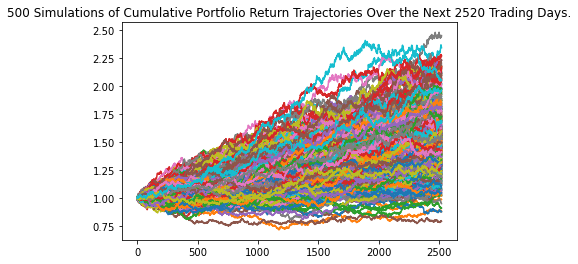

In [32]:
# Plot simulation outcomes
portafolio_sim_10y_plot = portafolio_sim_10y.plot_simulation()

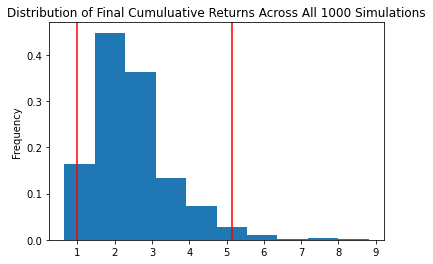

In [316]:
# Plot probability distribution and confidence intervals
dis_plot_10y = portafolio_sim_10y.plot_distribution()

In [319]:
# Fetch summary statistics from the Monte Carlo simulation results
port_10y_sum = portafolio_sim_10y.summarize_cumulative_return()

# Print summary statistics
print(port_10y_sum)

count           1000.000000
mean               2.460718
std                1.046566
min                0.647473
25%                1.738256
50%                2.280455
75%                2.911008
max                8.815711
95% CI Lower       0.999172
95% CI Upper       5.136013
Name: 2520, dtype: float64


In [321]:
# Set initial investment
initial_invesment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
portafolio_10y_lower = round(port_10y_sum[8]*initial_investment,2)
portafolio_10y_upper = round(port_10y_sum[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${portafolio_10y_lower} and ${portafolio_10y_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $19983.45 and $102720.26


In [326]:
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${portafolio_10y_lower} and ${portafolio_10y_upper}")
print('---------------------------------------------------------------------------------------------------')
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${portafolio_lower} and ${portafolio_upper}")
print('----------------------------------------------------------------------------------------------------')
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${portafolio_ci_lower} and ${portfolio_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $19983.45 and $102720.26
---------------------------------------------------------------------------------------------------
There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $17644.98 and $52519.22
----------------------------------------------------------------------------------------------------
There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $96466.26 and $1003650.19
